# Tutorial 1: Generating data with TabEBM

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install tabebm

In [2]:
from tabebm.TabEBM import TabEBM

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
def create_two_blobs_at_distance(num_samples=200, blob1_num_samples=None, blob2_num_samples=None, distance=1.0, random_state=42):
	"""
	Create two Gaussian blobs at distance D from the center
	"""
	if num_samples!=None:
		np.random.seed(random_state)
		X1 = np.random.randn(num_samples//2, 2) # class 1
		X2 = np.random.randn(num_samples//2, 2) # class 2
	else:
		X1 = np.random.randn(blob1_num_samples, 2) # class 1
		X2 = np.random.randn(blob2_num_samples, 2) # class 2

	X1[:,0] -= distance/2
	X2[:,0] += distance/2

	X = np.concatenate([X1, X2], axis=0)
	y = np.concatenate([np.zeros(len(X1)), np.ones(len(X2))], axis=0)

	return X, y

# Data Generation using TabEBM

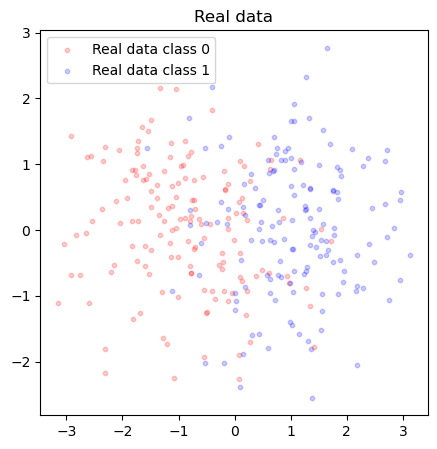

In [4]:
X, y = create_two_blobs_at_distance(num_samples=None, blob1_num_samples=150, blob2_num_samples=150, distance=2, random_state=40)
# ==== scatter the points ====
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Real data class 0', alpha=0.2, s=10)
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Real data class 1', alpha=0.2, s=10)
ax.set_title('Real data')
ax.legend()
plt.show()

In [5]:
tabebm = TabEBM()
augmented_data = tabebm.generate(
    X, y, num_samples = 50,
    sgld_steps = 200
)

/home/xj265/anaconda3/envs/llm/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/xj265/anaconda3/envs/llm/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/xj265/anaconda3/envs/llm/lib/python3.10/site

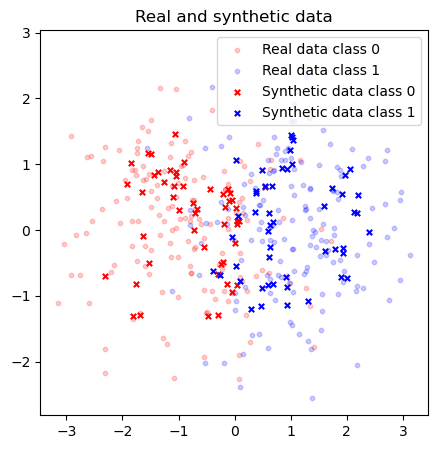

In [6]:
# ==== Scatter the real points ====
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Real data class 0', alpha=0.2, s=10)
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Real data class 1', alpha=0.2, s=10)

# ==== Scatter the generated points ====
ax.scatter(augmented_data['class_0'][:, 0], augmented_data['class_0'][:, 1], c='red', s=15, marker='x', label='Synthetic data class 0')
ax.scatter(augmented_data['class_1'][:, 0], augmented_data['class_1'][:, 1], c='blue', s=15, marker='x', label='Synthetic data class 1')

ax.set_title('Real and synthetic data')
ax.legend()
plt.show()